In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot


def rfeFeature(indep_X,dep_Y,n):
    rfelist=[]
    
    DT= DecisionTreeClassifier(criterion = 'gini', max_features='sqrt',splitter='best',random_state = 0)
    
    rfe=RFE(DT,n_features_to_select=n, step=1)
    fit1=rfe.fit(indep_X,dep_Y)
    rfe_features=fit1.transform(indep_X)
    selectedCol=indep_X.columns[fit1.get_support(indices=True)]
    rfelist.append(rfe_features)
    return rfelist,selectedCol

def split_scalar(indep_X,dep_Y):
    X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)  
    return X_train, X_test, y_train, y_test

def cm_prediction(classifier,X_test):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    Accuracy=accuracy_score(y_test, y_pred )
    report=classification_report(y_test, y_pred)
    
    return  classifier,Accuracy,report,X_test,y_test,cm


def logistic(X_train,y_train,X_test): 
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    importance=classifier.coef_[0]
    return  classifier,Accuracy,report,X_test,y_test,cm,importance

In [2]:
dataset=pd.read_csv('prep.csv',index_col=None)
df=dataset

df=pd.get_dummies(df,drop_first=True)

indep_X=df.drop('classification_yes',axis=1)
dep_Y=df['classification_yes']

In [3]:
rfelist,selected=rfeFeature(indep_X,dep_Y,5) 

acclog=[]

for i in rfelist:
    X_train, X_test, y_train, y_test=split_scalar(i,dep_Y)
    classifier,Accuracy,report,X_test,y_test,cm,importances=logistic(X_train,y_train,X_test)
    acclog.append(Accuracy)


acclog

[0.95]

In [4]:
feature_importance = pd.DataFrame({'Feature': selected,'importances': importances})
print("\nFeature Importance (importances):")
print(feature_importance.sort_values(by='importances', ascending=False))


Feature Importance (importances):
      Feature  importances
0          sc     1.955635
4      dm_yes     1.950766
2        sg_c     1.613289
3  rbc_normal    -1.535725
1        hrmo    -3.298167


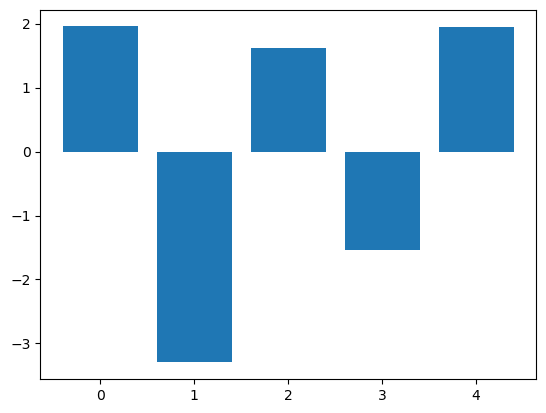

In [7]:
pyplot.bar([x for x in range(len(importances))],importances)
pyplot.show()